In [14]:
library(MASS)
x <- geyser$duration
xrange <- extendrange(range(x))
funx <- seq(xrange[1], xrange[2], length.out = 200)

In [26]:
kernelEstimate <- function(x, xis, h =1,  k.fun = function(x, xi, h){abs(x-xi)}){
    summer <- 0
    estimates <- vector("numeric", length= length(x))
    for (i in 1:length(x)){
        estimates[i] <- sum(k.fun(x[i], xis, h))
    }
    N <- length(xis)
    return(estimates/(N*h))
}

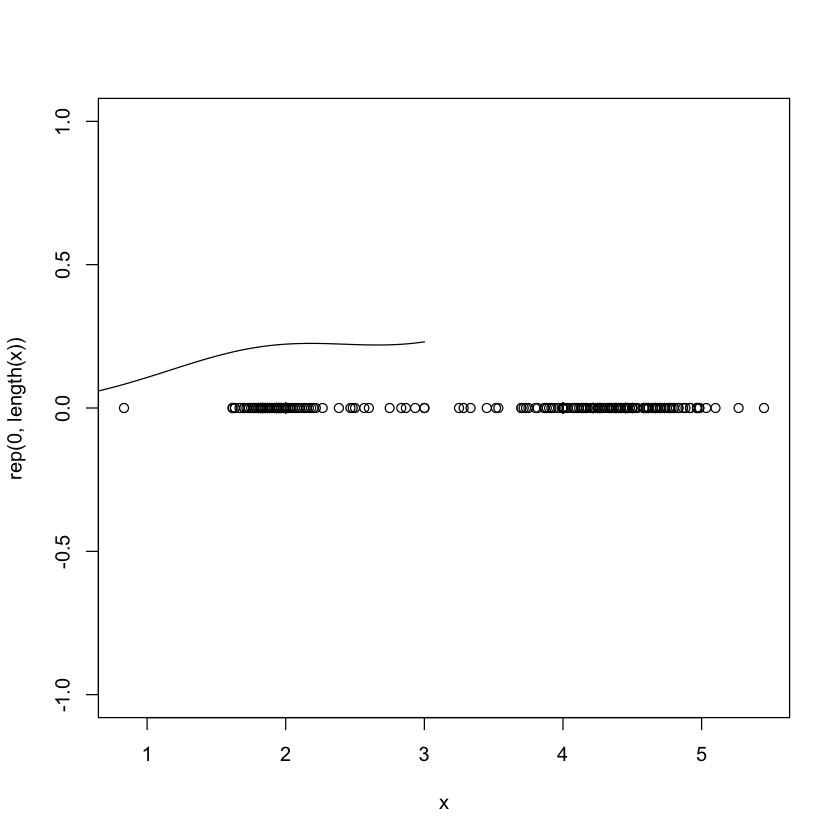

In [84]:
kernelFn <- function(x, xi,h){
    dnorm(xi, mean=x, sd=h)
}
plot(x, y=rep(0, length(x)))

lines(funx, kernelEstimate(funx, x, h=0.8, k.fun = kernelFn ))

# Generate Some mixture distribution

In [85]:
mix.dist <- function(p1, p2, f1 = function(n){runif(n,0,1)}, f2  = function(n){runif(n,1,2)}){
    return(function(n){
        u <- runif(n)
        sapply(u, FUN = function(ui){
            if (ui < p1){
                return(f1(1))
            } else {
                return(f2(1))
            }
        })
    })
}

In [86]:
myx <- mix.dist(0.5, 0.5, f1 = function(n){rnorm(n, mean=0, sd=0.1)})(1000)

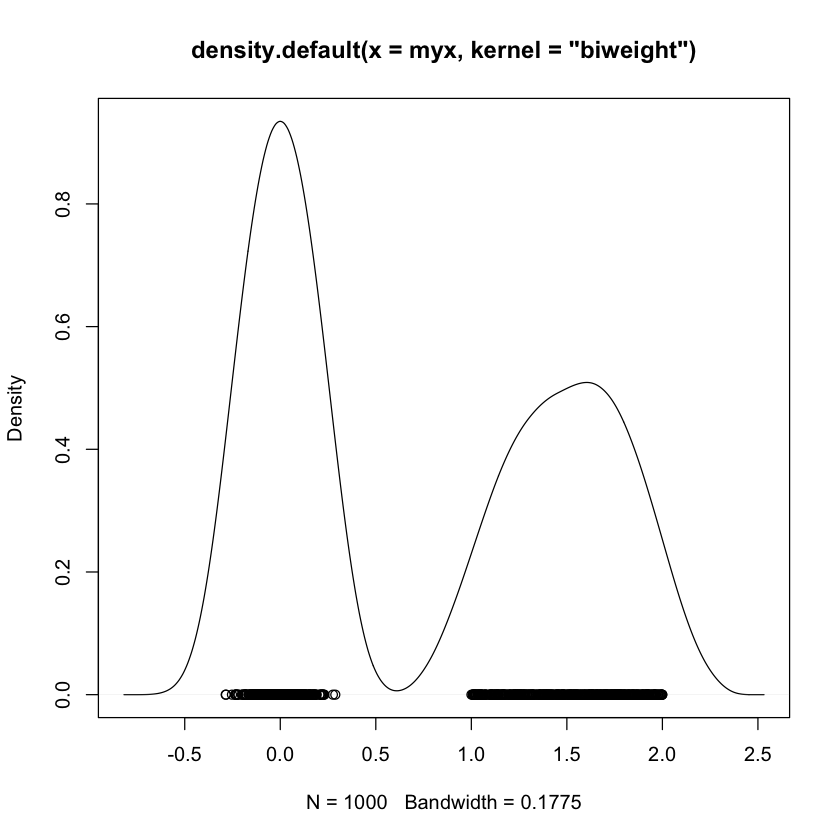

In [94]:
funx <- seq(from=-1, to=3, length.out = 100)

plot(density(myx, kernel = 'biweight'), type='l')
points(myx, y=rep(0, length(myx)))